In [427]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, accuracy_score, make_scorer
from sklearn.preprocessing import label_binarize, StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer


In [428]:
df_esg = pd.read_csv("ESGData_cleaned2.csv")
df_esg.columns = df_esg.columns.str.replace('\n', '')

Y = df_esg["MSCI ESG Rating"].astype(str)  # Convert target variable to string
X = df_esg.drop(["MSCI ESG Rating", "Ticker"], axis=1)

In [429]:
print(df_esg.dtypes)

Ticker              object
MSCI ESG Rating     object
ROA LF             float64
ROE LF             float64
Alpha:Y-1          float64
P/E                float64
Dvd Est Yld        float64
Beta:Y-1           float64
GICS Sector         object
dtype: object


In [430]:
df_esg.describe()

,ROA LF,ROE LF,Alpha:Y-1,P/E,Dvd Est Yld,Beta:Y-1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,8.378441,29.421091,0.008405,28.405116,1.728123,0.940389
std,7.454827,40.127873,0.094069,23.452262,1.600268,0.282056
min,-4.400465,-30.149429,-0.523200,4.077623,0.000000,0.251694
25%,3.322538,10.699647,-0.034777,14.617019,0.410450,0.759841
50%,6.510545,19.104299,0.017280,21.975324,1.560500,0.916256
75%,11.078058,31.760816,0.061824,33.082682,2.635250,1.088387
max,55.224445,338.688293,0.419720,184.531921,12.380000,1.901149


In [431]:
df_esg.head()

,Ticker,MSCI ESG Rating,ROA LF,ROE LF,Alpha:Y-1,P/E,Dvd Est Yld,Beta:Y-1,GICS Sector
0,AXP UN Equity,AA,4.243054,35.132084,0.132135,19.507507,1.060,0.983499,Financials
1,VZ UN Equity,A,6.460472,29.492355,-0.026806,9.940924,4.798,0.464678,Communication Services
2,PEP UW Equity,AA,8.222564,51.652710,0.067592,26.791130,2.694,0.609524,Consumer Staples
3,CAT UN Equity,A,8.055016,40.792080,-0.035480,17.117626,2.380,0.830970,Industrials
4,JPM UN Equity,A,1.355861,18.287388,-0.008087,9.839921,2.735,0.852132,Financials


#### Model Fit

In [432]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

categorical_features = ['GICS Sector']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', SVC(kernel='sigmoid'))])

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters found:", grid_search.best_params_)

Y_pred_grid = grid_search.predict(X_test)
Y_pred_label_grid = label_encoder.inverse_transform(Y_pred_grid)

print("Classification Report with Best Parameters:\n", classification_report(label_encoder.inverse_transform(Y_test), Y_pred_label_grid))
print("Accuracy with Best Parameters:", accuracy_score(label_encoder.inverse_transform(Y_test), Y_pred_label_grid))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classi

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=sigmoid; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=sigmoid; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=sigmoid; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier_

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [433]:
# model with best parameter picked by grid search
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', SVC(kernel='sigmoid'))])

pipeline.fit(X_train, Y_train)

Y_pred = pipeline.predict(X_test)
Y_pred_label = label_encoder.inverse_transform(Y_pred)

print(classification_report(label_encoder.inverse_transform(Y_test), Y_pred_label))
print("Accuracy:", accuracy_score(label_encoder.inverse_transform(Y_test), Y_pred_label))


              precision    recall  f1-score   support

           A       0.26      0.43      0.32        21
          AA       0.50      0.15      0.23        27
         AAA       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         5
          BB       0.00      0.00      0.00        12
         BBB       0.34      0.65      0.44        31
         CCC       0.00      0.00      0.00         1

    accuracy                           0.32       102
   macro avg       0.16      0.17      0.14       102
weighted avg       0.29      0.32      0.26       102

Accuracy: 0.3235294117647059


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


$\textbf{Method Explanation for SVM Classification:}$ The SVM model was chosen due to its robustness and versatility in binary and multi-class classification problems. In our methodology, we included one-hot encoding to convert categorical variables, such as `GICS Sector', into a binary format suitable for SVM, ensuring no artificial ordinal relationships were imposed. Additionally, feature scaling was applied to standardize the range of our continuous features, thereby enhancing the SVM's performance by equalizing the influence of each feature. $\\$

$\textbf{Kernel Trick and Parameter Optimization:}$ We utilized the powerful kernel trick to transform the data into a higher-dimensional space, allowing for the separation of data points that are not linearly separable in the original space. The kernel types explored included `linear`, `polynomial`, `RBF`, and `sigmoid`, each providing different complexities and boundaries to classify the data points effectively. Grid search optimization was employed to fine-tune the hyperparameters, particularly the penalty parameter `C`, which controls the trade-off between achieving a low-error classifier and a classifier that is less sensitive to outliers, and `gamma', which defines the influence of individual training samples on the decision boundary. After using the grid search method, we conclude that the best parameters are {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'sigmoid'}. Since the dataset is not large, there is a higher possibility of overfitting. Therefore, a lower C value is preferred in this setting.


$\textbf{Model Evaluation and Results Interpretation:}$ The performance of our SVM model was evaluated based on its precision in classifying the test data. The SVM's ability to demarcate boundaries between classes with a hyperplane maximizes the margin and provides robust classification.

Results are summarized below (for a fixed penalty parameter 'C'):
- The accuracy rate with linear kernel is: 29.4% 
- The accuracy rate with polynomial kernel is: 25.5% 
- The accuracy rate with rbf kernel is: 32.4% 
- The accuracy rate with sigmoid kernel is: 32.4% 

As we observe, our SVM models with RBF and sigmoid kernels have the best performance, achieving an accuracy rate of approximately 32.4%. On the other hand, the SVM model with a polynomial kernel performs the worst, with an accuracy rate of 25.5%. This could be due to the fact that the true decision boundary in the dataset is not polynomial. As a result, the polynomial kernel might fail to fit the data well as it tries to map the original features into a polynomial feature space. Regarding the best performance (32.4%), it is certainly not an ideal result. However, given the following two facts, the performance actually makes sense. First, we have a small dataset—the total number of samples in this dataset is only 506. This is extremely small in the field of machine learning, and thus will no doubt drag down the performance of any model in this setting. In fact, if a model has a really high accuracy rate in this case, it is very likely that the model is overfitting the data. Secondly, there are seven classes to predict. If we were to guess randomly, the probability of guessing the right class is around 14.3%. As a result, a performance of 32.4% is already much better than random guessing, proving the usefulness of our model.

#### ROC Curve

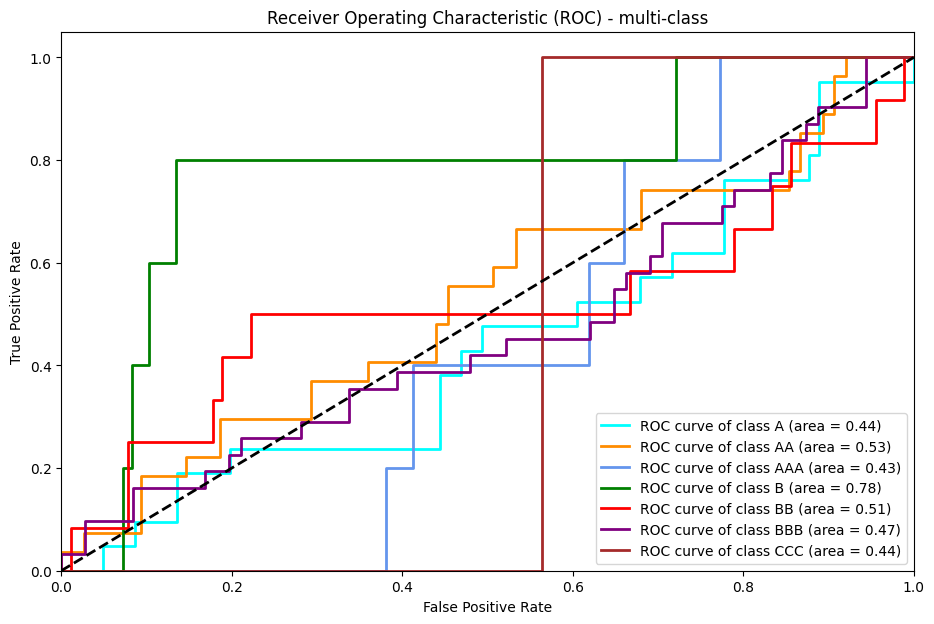

In [434]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', OneVsRestClassifier(SVC(kernel='sigmoid', probability=True)))])
pipeline.fit(X_train, Y_train)

Y_proba = pipeline.predict_proba(X_test)
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_train))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(11, 7))
lw = 2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - multi-class')
plt.legend(loc='lower right')
plt.show()

Rating A's AUC score: 0.439
Rating AA's AUC score: 0.529
Rating AAA's AUC score: 0.431
Rating B's AUC score: 0.777
Rating BB's AUC score: 0.513
Rating BBB's AUC score: 0.468
Rating CCC's AUC score: 0.436


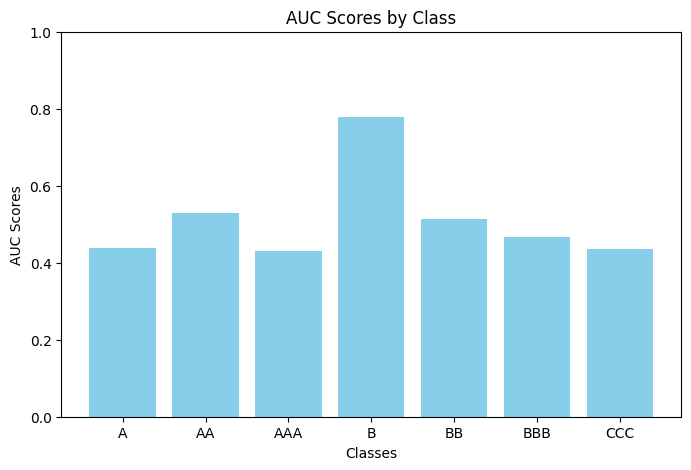

In [435]:
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    roc_auc[label_encoder.classes_[i]] = roc_auc_score(Y_test_binarized[:, i], Y_proba[:, i])

classes = list(roc_auc.keys())
auc_scores = list(roc_auc.values())

for i in roc_auc:
    print(f'Rating {i}\'s AUC score: {roc_auc[i]:.3f}')

plt.figure(figsize=(8, 5))
plt.bar(classes, auc_scores, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('AUC Scores')
plt.title('AUC Scores by Class')
plt.ylim([0, 1])
plt.show()

#### ROC Interpretation

The ROC curves appear as staircases with very pronounced steps, a characteristic likely due to a limited number of samples. With a larger sample size, we would expect the ROC curves to become smoother. Despite the step-like ROC curves, it is readily apparent that the model performs optimally when classifying bonds with a B rating. The performance on other bond ratings is comparable. This pattern may be a particular feature of this dataset. It suggests that for a bond to be classified as either "too good" or "too bad," it must exhibit multiple specific features. Conversely, a B rating, being intermediate, might be easier to classify due to fewer stringent classification criteria.

### Potential Class Imbalance Problem

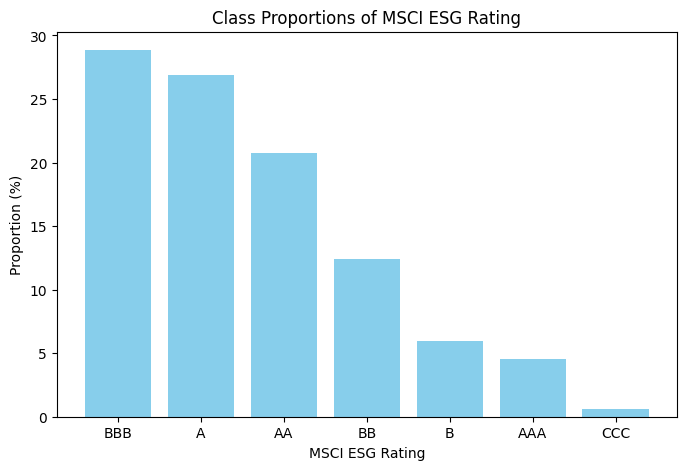

MSCI ESG Rating
BBB    28.853755
A      26.877470
AA     20.750988
BB     12.450593
B       5.928854
AAA     4.545455
CCC     0.592885
Name: proportion, dtype: float64


In [436]:
class_proportions = df_esg["MSCI ESG Rating"].value_counts(normalize=True) * 100
df_class_proportions = pd.DataFrame(list(class_proportions.items()), columns=['MSCI ESG Rating', 'Proportion'])

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.bar(df_class_proportions['MSCI ESG Rating'], df_class_proportions['Proportion'], color='skyblue')
plt.xlabel('MSCI ESG Rating')
plt.ylabel('Proportion (%)')
plt.title('Class Proportions of MSCI ESG Rating')
plt.show()
print(class_proportions)

The class imbalance problem is a common issue in machine learning, particularly in classification tasks, where the number of instances in each class is not evenly distributed. Such imbalances can lead to biased models that may over-predict the majority class and under-predict the minority class, often resulting in poor classification performance, especially for the under-represented classes.

In our dataset, the class distribution for the 'MSCI ESG Rating' within the dataset shows a significant imbalance. The majority class 'BBB' constitutes approximately 28.85% of the data, while the minority class 'CCC' represents only about 0.59%. This vast disparity indicates that the dataset is highly skewed, which could potentially lead to a classifier that performs well in predicting the majority class but poorly in detecting the minority classes.

To address this imbalance, our model uses Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is an oversampling method that generates synthetic samples for the minority class. Rather than simply duplicating existing minority instances, which could lead to overfitting, SMOTE creates new, synthetic samples that are interpolated between existing ones in the feature space. This method enhances the representation of the minority class in the training data, allowing the classifier to learn more generalizable decision boundaries. By employing SMOTE in conjunction with SVM, we aim to create a more balanced dataset that allows the SVM to perform more equitably across classes. The SVM can then establish a decision boundary that does not bias towards the majority class. This rebalancing is critical for ensuring that the model's predictive performance improves, not just overall but for each class individually.

In our model, we combine SMOTE method while also using the `class_weight` parameter in SVM classifier to deal with the potential data imblance problem. This parameter automatically adjusts weights inversely proportional to class frequencies in the input data. The formula used for the 'balanced' mode is: $w_j = \frac{n}{k \cdot n_j}$ where $w_j$ is the weight to be assigned to class j, n is the total number of samples, $ n_j$ is the number of samples in class j, andk is the total number of classes.

In [437]:
Y = df_esg['MSCI ESG Rating'].astype(str).dropna()

Y_encoded = label_encoder.fit_transform(Y)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
# Use the class weight parameter to adjust for imbalanced classes
svm_classifier = SVC(kernel='sigmoid', class_weight='balanced', probability=True)

smote = SMOTE(random_state=100, k_neighbors=1)

# Create the pipeline with SMOTE and the SVM classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', svm_classifier)
])

pipeline.fit(X_train, Y_train)

Y_pred = pipeline.predict(X_test)
Y_pred_decoded = label_encoder.inverse_transform(Y_pred)
Y_test_decoded = label_encoder.inverse_transform(Y_test)

print("Classification Report:\n", classification_report(Y_test_decoded, Y_pred_decoded))
print("Accuracy:", accuracy_score(Y_test_decoded, Y_pred_decoded))

Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00        21
          AA       0.40      0.37      0.38        27
         AAA       0.08      0.40      0.13         5
           B       0.04      0.20      0.06         5
          BB       0.00      0.00      0.00        12
         BBB       0.14      0.06      0.09        31
         CCC       0.00      0.00      0.00         1

    accuracy                           0.15       102
   macro avg       0.09      0.15      0.10       102
weighted avg       0.16      0.15      0.14       102

Accuracy: 0.14705882352941177


In [438]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', svm_classifier)
])

pipeline.fit(X_train, Y_train)

Y_proba = pipeline.predict_proba(X_test)
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_train))

Rating A's AUC score: 0.595
Rating AA's AUC score: 0.532
Rating AAA's AUC score: 0.588
Rating B's AUC score: 0.602
Rating BB's AUC score: 0.527
Rating BBB's AUC score: 0.488
Rating CCC's AUC score: 0.564


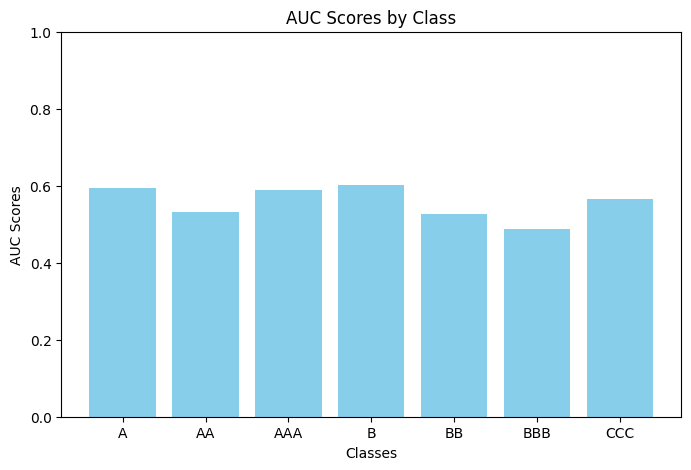

In [439]:
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    roc_auc[label_encoder.classes_[i]] = roc_auc_score(Y_test_binarized[:, i], Y_proba[:, i])

classes = list(roc_auc.keys())
auc_scores = list(roc_auc.values())

for i in roc_auc:
    print(f'Rating {i}\'s AUC score: {roc_auc[i]:.3f}')

plt.figure(figsize=(8, 5))
plt.bar(classes, auc_scores, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('AUC Scores')
plt.title('AUC Scores by Class')
plt.ylim([0, 1])
plt.show()

$\textbf{Conclusion}:$ Using the combined SMOTE method and class_weight parameter gives us an accuracy of 14.7%, which is much lower than our model without using them. However, this does not mean SMOTE and changing the parameter fail to work. It's important to note that while SMOTE helps balance the class distribution and can improve the classifier's performance on minority classes, it does not guarantee an increase in overall accuracy. In fact, if we compare the AUC scores for each class before and after we account for the imbalance data, the least represent class CCC (0.59% of total samples)'s AUC score increases to 0.564 from 0.436, and the second least represent class AAA (4.54%% of total samples)'s AUC score increases to 0.588 from 0.431. These results show that by using the combination of SMOTE method and class_weight parameter, our model does a better job in predicting classes that are least represented in the total samples. 

Despite the robustness of SVMs and the comprehensive preprocessing undertaken, the accuracy levels achieved suggest room for further refinement. Future work may involve exploring additional kernel functions, integrating ensemble methods, or employing advanced feature selection techniques such as feature engineering. The increase in dataset's size and the use of advanced optimization algorithms could further enhance the predictive accuracy and generalizability of our SVM model.